In [47]:
%reset

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
import matplotlib
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=False)
pl.rc('font', family='serif')

# %matplotlib inline



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [48]:
def corr_mat(cov):
    dims = cov.shape
    corr = np.zeros(dims)
    for ii in range(0,dims[0]):
        for jj in range(0,dims[1]):
            corr[ii,jj] = cov[ii,jj]/np.sqrt(cov[ii,ii]*cov[jj,jj])

    return corr

import math
import numpy as np

the_gold_standard = { 0: (203.0/255.0, 15.0/255.0, 40.0/255.0),
                      1: (255.0/255.0, 165.0/255.0, 0.0),
                      2: (42.0/255.0, 46.0/255.0, 139.0/255.0),
                      3: (0.0/255.0, 153.0/255.0, 204.0/255.0),
                      4: (0.0/255.0, 221.0/255.0, 52.0/255.0),
                      5: (0.0, 0.75, 0.75),
                      6: (0.0, 0.0, 0.0),
                    }

# ******************************************************************************
# definition of color interpolation utilities:

def color_linear_interpolation( rgb_1, rgb_2, alpha ):
    """
    This function performs a linear color interpolation in RGB space.
    alpha has to go from zero to one and is the coordinate.
    """
    _out_color = []
    for _a,_b in zip(rgb_1,rgb_2):
        _out_color.append( float(_a +(_b-_a)*alpha) )
    return tuple(_out_color)


def nice_colors( num, colormap='the_gold_standard', interpolation_method='linear', output_format='RGB' ):
    """
    This function returns a color from a colormap defined above, according to the
    number entered.

    :param num: input number. Can be an integer or float.
        If the number is integer the function returns one of the colors in the
        colormap. If the number is a float returns the shade combining the two
        neighbouring colors.
    :type num: :class:`int` or :class:`float`

    :param colormap: a string containing the name of the colormap.
    :type colormap: :class:`string`

    :param interpolation_method: the method to interpolate between colors.
        Legal choices are:
            interpolation_method='linear', linear interpolation;
        Further interpolation methods will be added in the future.
    :type interpolation_method: :class:`string`

    :param output_format: output format of the color.
        Legal choices are:
            output_format='HEX'
            output_format='RGB' (default)
    :type output_format: :class:`string`

    :return: string with HEX color or tuple with RGB coordinates

    """
    # get the colormap:
    try:
        _cmap = globals()[str(colormap)]
    except:
        raise ValueError('Requested color map ('+str(colormap)+') does not exist.')
    # get the indexes of the color map:
    _idx_low = int( math.floor(num%len(_cmap)) )
    _idx_up  = int( math.floor((_idx_low+1)%len(_cmap)) )
    # perform color interpolation:
    if interpolation_method=='linear':
        _t = num%len(_cmap)-_idx_low
        _out_color = color_linear_interpolation(_cmap[_idx_low],_cmap[_idx_up],_t)
    else:
        raise ValueError('Requested color interpolation method ('+str(interpolation_method)+') does not exist.')
    # choose the output format:
    if output_format=='HEX':
        _out_color = '#%02x%02x%02x' % tuple( [ int(_c*255.) for _c in _out_color] )
        _out_color = str(_out_color)
    elif output_format=='RGB':
        pass
    else:
        raise ValueError('Requested output format ('+str(output_format)+') does not exist.')
    #
    return _out_color





In [37]:
# filenames = ['/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_0.4_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.4_0.55_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.55_0.7_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.7_0.85_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.85_0.95_dojk_True_njk_60_desy3_w1.pk',
# '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.95_1.05_dojk_True_njk_60_desy3_w1.pk',
#              '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk'    
#             ]

# labels = ['0.2 < z < 0.4','0.4 < z < 0.55','0.55 < z < 0.7', '0.7 < z < 0.85', '0.85 < z < 0.95', '0.95 < z < 1.05','All bins']


# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.



In [70]:
zmin_bins = np.array([0.2, 0.4, 0.55, 0.7, 0.85, 0.95])
zmax_bins = np.array([0.4, 0.55, 0.7, 0.85, 0.95, 1.05 ])
# labels = ['0.2 < z < 0.4','0.4 < z < 0.55','0.55 < z < 0.7', '0.7 < z < 0.85', '0.85 < z < 0.95', '0.95 < z < 1.05','All bins']
save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
filenames = []
labels = []
for j in range(len(zmin_bins)):
    filenames.append(save_dir + 'dy_act_deprojects_None_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk')   
    labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))


linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.




In [39]:
# filenames = [
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_None_v1.0.0_fwhm_2arcmin_nside4096__cat_redmagic_z_0.15_0.9_dojk_True_njk_60_desy3_w1.pk',
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_cib_v1.0.0_fwhm_2arcmin_nside4096__cat_redmagic_z_0.15_0.9_dojk_True_njk_60_desy3_w1.pk',
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_cmb_v1.0.0_fwhm_2arcmin_nside4096__cat_redmagic_z_0.15_0.9_dojk_True_njk_60_desy3_w1.pk'
# ]

# labels = ['Redmagic, Deproject None', 'Redmagic, Deproject CIB', 'Redmagic, Deproject CMB']

# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.






In [73]:
# filenames = [
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_None_v1.0.0_fwhm_2arcmin_nside4096__cat_maglim_z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk',
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_cib_v1.0.0_fwhm_2arcmin_nside4096__cat_maglim_z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk',
# '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_cmb_v1.0.0_fwhm_2arcmin_nside4096__cat_maglim_z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk',
# ]

# labels = ['Maglim, Deproject None', 'Maglim, Deproject CIB', 'Maglim, Deproject CMB']


# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.







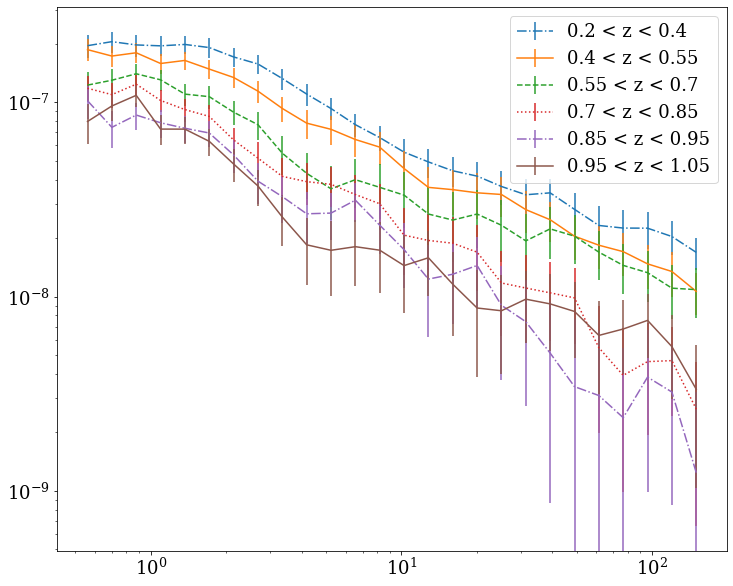

In [51]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((12,10))

for j in range(len(filenames)):
    filename = filenames[j]
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']

    randytruth = haloydata['randytruth']
    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']

        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(xi_dytruth.transpose(),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))


    
    ax.errorbar(factor*np.exp(dytruth.logr), xi_dytruth, yerr=xi_dytruth_sigma,label = labels[j], linestyle=linestyles[j])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()



In [54]:
# zmin_bins = np.array([0.2, 0.4, 0.55, 0.7, 0.85, 0.95])
# zmax_bins = np.array([0.4, 0.55, 0.7, 0.85, 0.95, 1.05 ])
# # labels = ['0.2 < z < 0.4','0.4 < z < 0.55','0.55 < z < 0.7', '0.7 < z < 0.85', '0.85 < z < 0.95', '0.95 < z < 1.05','All bins']
# save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
# filenames = []
# labels = []
# for j in range(len(zmin_bins)):
#     filenames.append(save_dir + 'dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk')   
#     labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))


# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.





In [60]:
# zmin_bins = np.array([0.15, 0.35, 0.5, 0.65, 0.8])
# zmax_bins = np.array([0.35, 0.5, 0.65, 0.8, 0.9])
    
# save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
# filenames = []
# labels = []
# for j in range(len(zmin_bins)):
#     filenames.append(save_dir + 'dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_redmagic_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk')   
#     labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))


# linestyles = ['-.','-','--',':','-.','-','--']
# factor = 1.



    
    
    
    

SNR 0.2 < z < 0.4:34.6 sigma
SNR 0.4 < z < 0.55:39.8 sigma
SNR 0.55 < z < 0.7:43.7 sigma
SNR 0.7 < z < 0.85:49.3 sigma
SNR 0.85 < z < 0.95:52.1 sigma
SNR 0.95 < z < 1.05:50.9 sigma


Text(0.5, 1.0, 'ACT v1 x Maglim Y3')

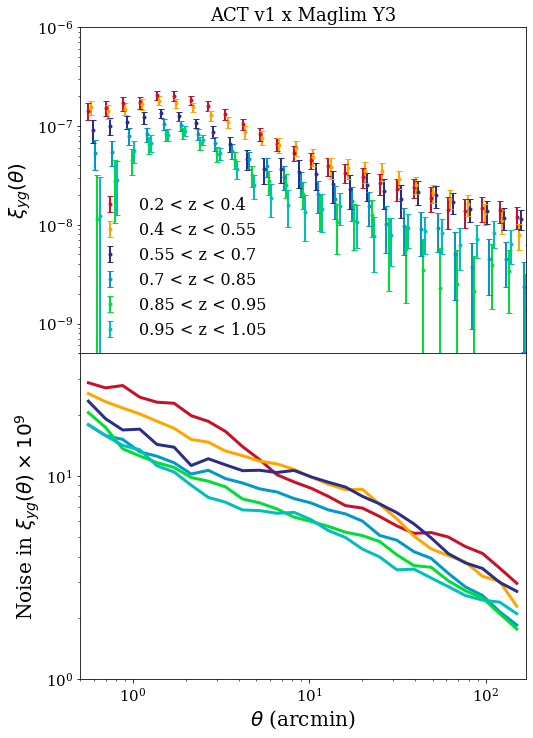

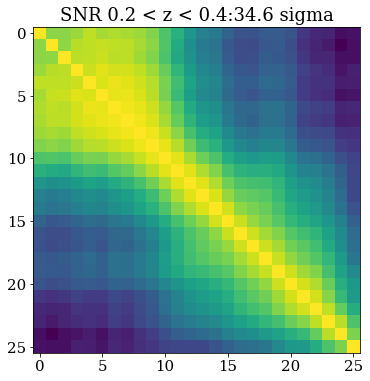

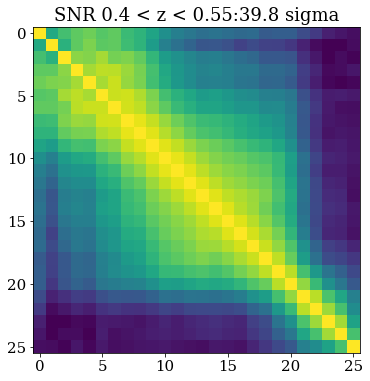

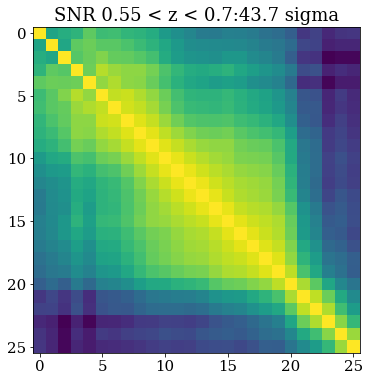

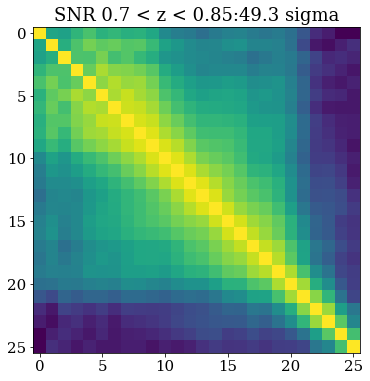

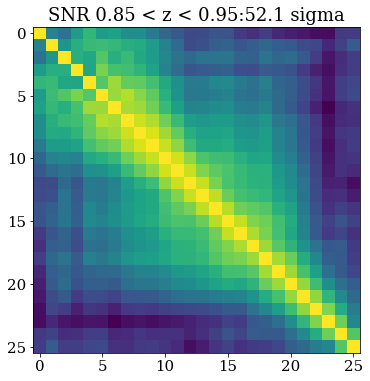

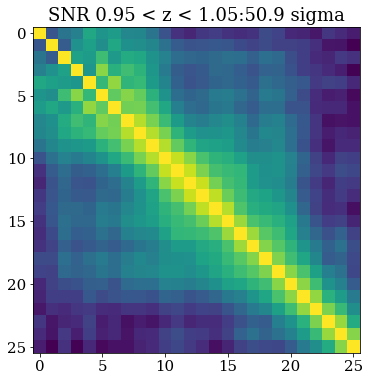

In [71]:


import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(2,1, sharex = True)
fig.set_size_inches((8,12))
fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

xmin = 0.5
xmax = 170.   


for j in range(len(filenames)):
    filename = filenames[j]    
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']



    randytruth = haloydata['randytruth']

    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']


        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

    
#     ax[0].errorbar(factor*np.exp(dyrecon.logr)*1.02**(j), xi_dy,  yerr=xi_dy_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color = Color[j+1])
    
#     ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color =nice_colors(j))
    if labels[j] == 'All bins':
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.03**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='-', capsize=3, lw = 2, color ='k',marker='.')
    else:
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.03**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2,marker='.', color =nice_colors(j))

    
    if j == 0:
        xi_interp_none = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')
    if j == 1:
        xi_interp_cib = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')
    if j==2:
        xi_interp_cmb = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')


        
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[0].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)

ax[0].set_xlim((xmin, xmax))
ax[0].set_ylim((5.0e-10,10.0e-7))
# ax.set_title('unitynullcmb nside bands methods')
ax[0].legend(fontsize = 20, frameon = False, loc = 'lower left')
#fig.tight_layout()

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)



# ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = 'Planck y', lw = 3, color = Color[0])
for j in range(len(filenames)):
    filename = filenames[j]
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']

    randytruth = haloydata['randytruth']
    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']

        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
        xi_cov = (1.0*(njk-1)/njk)* np.dot((xi_dytruth_all - xi_dytruth_mean).T , (xi_dytruth_all - xi_dytruth_mean))
        xi_corr = corr_mat(xi_cov)
        
        xi_invcov = np.linalg.inv(xi_cov)
#         pdb.set_trace()
        xi_snr = np.sqrt(np.dot(  np.array([dytruth.xi]), np.dot(xi_invcov, np.array([dytruth.xi]).T)  ))
        
        fig2, ax2 = pl.subplots(1,1)
        fig2.set_size_inches((8,6))
        ax2.imshow(xi_corr)
        ax2.tick_params(axis='both', which = 'minor', labelsize=15)
        ax2.tick_params(axis='both', which = 'major', labelsize=15)
        ax2.set_title('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma', size=18)
        fig2.savefig('corr_mat_' + str(labels[j]) + '.pdf')
        

        print('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma')

    if labels[j] == 'All bins':
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = 'k')
    else:
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = nice_colors(j))

 

ax[0].set_yscale('log')
ax[0].set_xlim((xmin, xmax))
# ax[0].set_ylim((2.0e-9,6.0e-8))
ax[0].legend(fontsize = 16, frameon = False, loc = 'lower left',ncol=1)    
    
ax[1].set_ylim((1.0, 40.0))
ax[1].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[1].set_ylabel(r'Noise in $\xi_{yg}(\theta) \times 10^9$', size = 20)


yticks = ax[1].yaxis.get_major_ticks()
yticks[-1].set_visible(False)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', which = 'minor', labelsize=15)

#pl.setp(ax[0].get_xticklabels(), visible=False)
#ax[0].tick_params(labelbottom=False)    
# print "ax[0].get_x = ", ax[0].get_xticklabels()[0].get_text()

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[1].set_yscale('log')
ax[0].set_title(r'ACT v1 x Maglim Y3', size=18 )
# ax[0].set_title(r'ACT v1 x Redmagic Y3', size=18 )
#xticks = ax[0].xaxis.get_minor_ticks()
#xticks[0].set_visible(False)

#xticks = ax[0].xaxis.get_major_ticks()
#xticks[0].set_visible(False)

#ax[0].set_xticklabels(['','','',''])
#ax[0].set_xticklabels(['','','',''], minor = True)



# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')








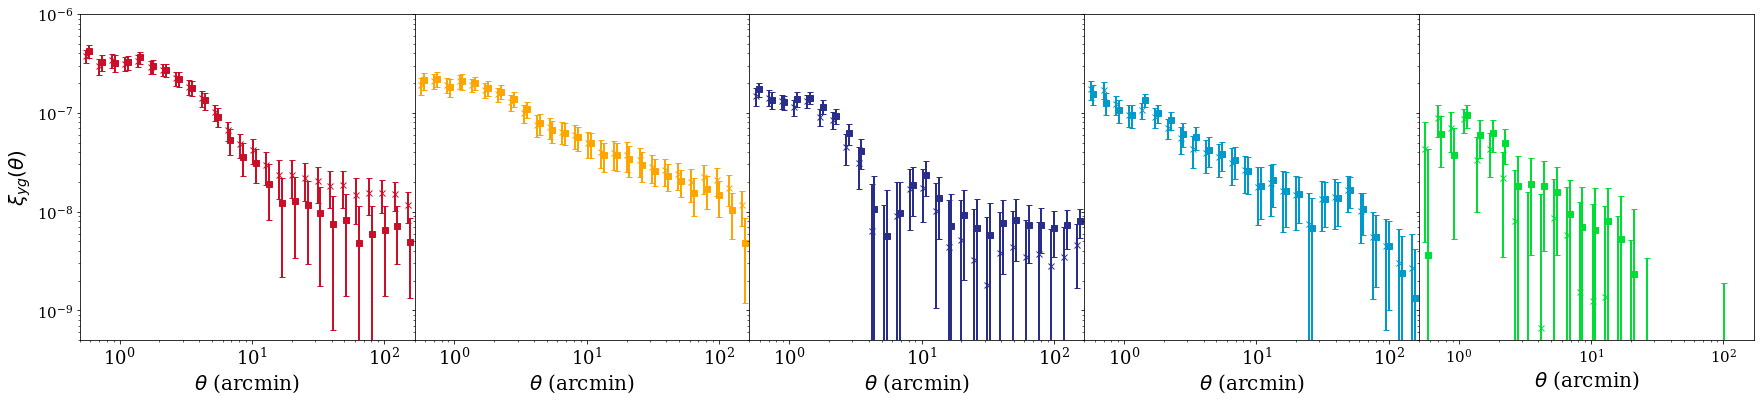

In [68]:
zmin_bins = np.array([0.15, 0.35, 0.5, 0.65, 0.8])
zmax_bins = np.array([0.35, 0.5, 0.65, 0.8, 0.9])

import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(1,5, gridspec_kw = {'wspace':0.0, 'hspace':0.0},sharey=True,sharex=True)
fig.set_size_inches((30,6))
# fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

xmin = 0.5
xmax = 170.   
linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.
markers = ['x','s','o','D','d','+']

save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
filenames = []
labels = []
for j in range(len(zmin_bins)):
#     filenames.append()   
    labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))
    filename1 = save_dir + 'dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_redmagic_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    filename2 = save_dir + 'dy_act_deprojects_None_v1.0.0_wbeam_nside4096__cat_redmagic_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    
    for jf in range(2):
        if jf == 0:
            filename = filename1
        else:
            filename = filename2
        try:
            haloydata = pk.load(open(filename, "rb"))
        except:
            haloydata = pk.load(open(filename, "rb"),encoding='latin1')

        dytruth = haloydata['dytruth']
        randytruth = haloydata['randytruth']

        xi_dytruth = dytruth.xi - randytruth.xi

        if haloydata['do_jk']:
            njk = haloydata['njk']
            xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
            xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

        ax[j].errorbar(factor*np.exp(dytruth.logr)*1.05**(jf), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2,marker=markers[jf], color =nice_colors(j))  

    
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    if j == 0:
        ax[j].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)
        ax[j].set_ylim((5.0e-10,10.0e-7))
        ax[j].set_yscale('log')
        ax[j].tick_params(axis='y', labelsize=15)

    ax[j].set_xlim((xmin, xmax))
#     ax[j].legend(fontsize = 20, frameon = False, loc = 'lower left')


    ax[j].set_xlim((xmin, xmax))
#     ax[j].legend(fontsize = 16, frameon = False, loc = 'lower left',ncol=1)    

    ax[j].set_xscale('log')
# ax.set_title(r'ACT v1 x Maglim Y3', size=18 )



pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)


# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')









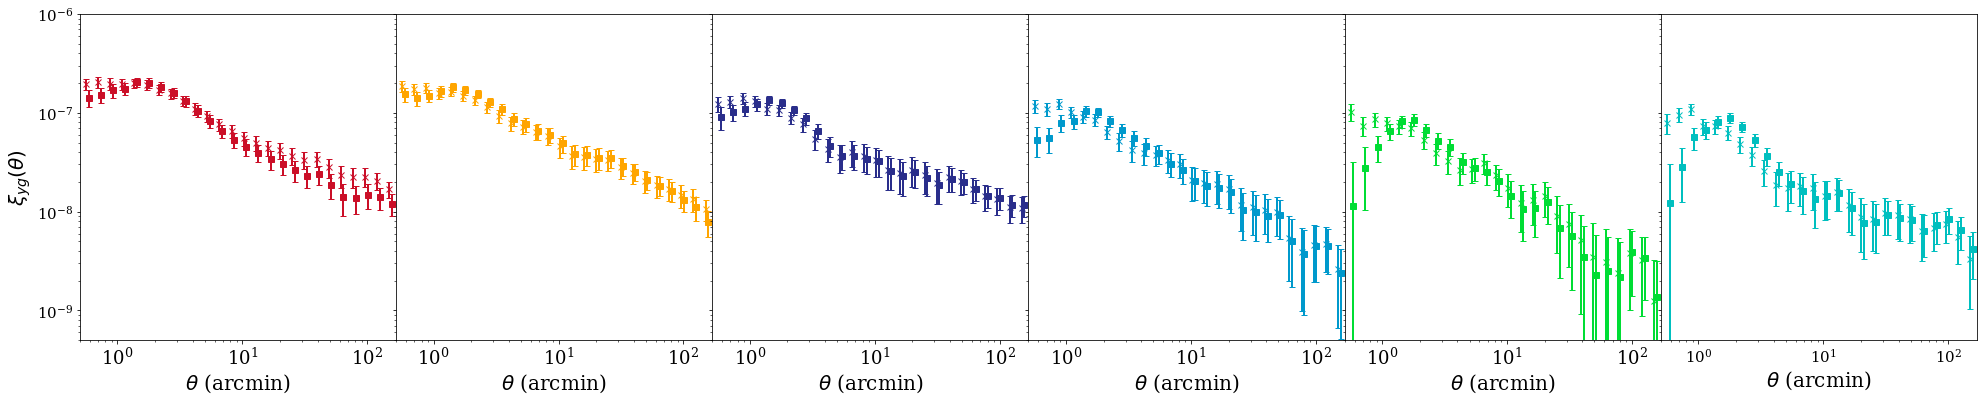

In [69]:
zmin_bins = np.array([0.2, 0.4, 0.55, 0.7, 0.85, 0.95])
zmax_bins = np.array([0.4, 0.55, 0.7, 0.85, 0.95, 1.05 ])

import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(1,6, gridspec_kw = {'wspace':0.0, 'hspace':0.0},sharey=True,sharex=True)
fig.set_size_inches((34,6))
# fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

xmin = 0.5
xmax = 170.   
linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.
markers = ['x','s','o','D','d','+']

save_dir = '/global/project/projectdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/'
filenames = []
labels = []
for j in range(len(zmin_bins)):
#     filenames.append()   
    labels.append(str(zmin_bins[j]) + ' < z < ' + str(zmax_bins[j]))
    filename1 = save_dir + 'dy_act_deprojects_cib_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    filename2 = save_dir + 'dy_act_deprojects_None_v1.0.0_wbeam_nside4096__cat_maglim_z_' + str(zmin_bins[j]) + '_' + str(zmax_bins[j]) + '_dojk_True_njk_180_desy3_w1.pk'
    
    for jf in range(2):
        if jf == 0:
            filename = filename1
        else:
            filename = filename2
        try:
            haloydata = pk.load(open(filename, "rb"))
        except:
            haloydata = pk.load(open(filename, "rb"),encoding='latin1')

        dytruth = haloydata['dytruth']
        randytruth = haloydata['randytruth']

        xi_dytruth = dytruth.xi - randytruth.xi

        if haloydata['do_jk']:
            njk = haloydata['njk']
            xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
            xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

        ax[j].errorbar(factor*np.exp(dytruth.logr)*1.05**(jf), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2,marker=markers[jf], color =nice_colors(j))  

    
    ax[j].set_xscale('log')
    ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    if j == 0:
        ax[j].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)
        ax[j].set_ylim((5.0e-10,10.0e-7))
        ax[j].set_yscale('log')
        ax[j].tick_params(axis='y', labelsize=15)

    ax[j].set_xlim((xmin, xmax))
#     ax[j].legend(fontsize = 20, frameon = False, loc = 'lower left')

    ax[j].set_xscale('log')
# ax.set_title(r'ACT v1 x Maglim Y3', size=18 )



pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)


# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')




In [30]:
import numpy as np
_,step = (np.linspace(np.log10(2.5), np.log10(250),20,retstep=True))
# dlog = 
# (( (np.log10(250) - np.log10(2.5))/20. ))
# 10**(np.arange(np.log10(2.5), np.log10(250),step))
step

0.10526315789473684

In [46]:
_, step2 = (np.linspace(np.log10(0.5), np.log10(168),25,retstep=True))

step2


0.10526413655791017

In [36]:
val, _ =(np.linspace(np.log10(1.0), np.log10(162),22,retstep=True))
10**val


array([  1.        ,   1.27413369,   1.62341667,   2.06844988,
         2.63548169,   3.35795602,   4.27848491,   5.45136178,
         6.94576372,   8.84983159,  11.27586862,  14.36696414,
        18.30543309,  23.32356908,  29.71734524,  37.86387087,
        48.24363367,  61.46883919,  78.31951916,  99.78953828,
       127.14521305, 162.        ])

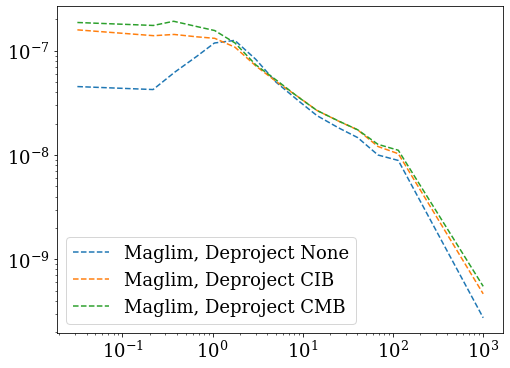

In [94]:
theta_array = np.logspace(-1.5,3,1000)
xi_none = np.exp(xi_interp_none(np.log(theta_array)))
xi_cib = np.exp(xi_interp_cib(np.log(theta_array)))
xi_cmb = np.exp(xi_interp_cmb(np.log(theta_array)))

fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))    
ax.errorbar(theta_array, xi_none,  label = labels[0], linestyle=linestyles[j])
ax.errorbar(theta_array, xi_cib,  label = labels[1], linestyle=linestyles[j])
ax.errorbar(theta_array, xi_cmb,  label = labels[2], linestyle=linestyles[j])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()





In [95]:
(np.sqrt((41000./(12.*4096**2))))*60.



0.8562342732788175

In [96]:
arcmin2rad = (1./60.)*(np.pi/180.)
from scipy import interpolate
from mcfit import Hankel
qv = 0.7
renorm = np.sqrt(np.pi / 2.)
# For J_0 transform
ell_out, Cellyk_none = Hankel(theta_array*arcmin2rad, nu=0, q=qv)(xi_none, extrap=True)
Cellyk_none *= ((2 * np.pi))

ell_out, Cellyk_cib = Hankel(theta_array*arcmin2rad, nu=0, q=qv)(xi_cib, extrap=True)
Cellyk_cib *= ((2 * np.pi))

ell_out, Cellyk_cmb = Hankel(theta_array*arcmin2rad, nu=0, q=qv)(xi_cmb, extrap=True)
Cellyk_cmb *= ((2 * np.pi))



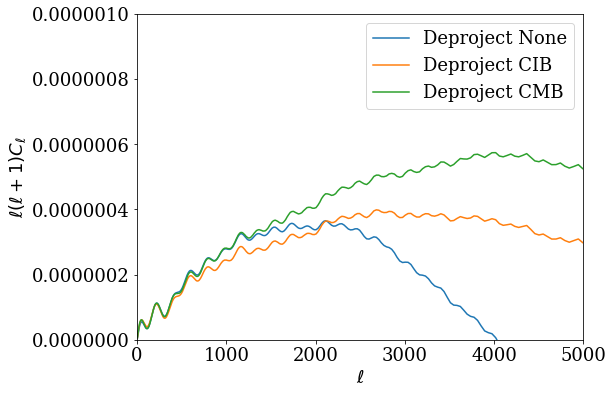

In [97]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))    
ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_none,label='Deproject None')
ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_cib,label='Deproject CIB')
ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_cmb,label='Deproject CMB')
# ax.errorbar(theta_array, xi_w1,  label = labels[j], linestyle=linestyles[j])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(0,5000)
ax.set_ylim(0,1e-6)
ax.set_ylabel(r'$\ell (\ell + 1) C_{\ell}$')
ax.set_xlabel(r'$\ell$')
ax.legend()






In [98]:
import pickle as pk
cld = pk.load(open('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/data/cls_20200319_measure_DESxACT-maglim-redmagic-alldeprojy_nside4096.pickle','rb'))  




In [58]:
cld.keys()


dict_keys(['ell', ('galaxy_density_maglim', 'ymap'), ('galaxy_density_redmagic', 'ymap'), ('ymap', 'ymap')])

In [59]:
cld[('galaxy_density_redmagic', 'ymap')].keys()



dict_keys([(5, 'y_no_deproj'), (5, 'y_deproj_cmb'), (5, 'y_deproj_cib')])

In [61]:
# ell = cld['ell']

# data_none = cld[('galaxy_density_redmagic', 'ymap')][(5, 'y_no_deproj')]['data']
# data_cib = cld[('galaxy_density_redmagic', 'ymap')][(5, 'y_deproj_cib')]['data']
# data_cmb = cld[('galaxy_density_redmagic', 'ymap')][(5, 'y_deproj_cmb')]['data']


In [99]:
ell = cld['ell']

data_none = cld[('galaxy_density_maglim', 'ymap')][(6, 'y_no_deproj')]['data']
data_cib = cld[('galaxy_density_maglim', 'ymap')][(6, 'y_deproj_cib')]['data']
data_cmb = cld[('galaxy_density_maglim', 'ymap')][(6, 'y_deproj_cmb')]['data']



In [100]:

theta_arcmin1 = 1.6
theta_rad1 = theta_arcmin1*(1./60.)*(np.pi/180.)
sig1 = theta_rad1/np.sqrt(8*np.log(2))
Bl1 = np.exp(-1.*ell*(ell+1)* (sig1**2)/2. )




Text(0.5, 1.0, 'ACT v1 x Maglim Y3')

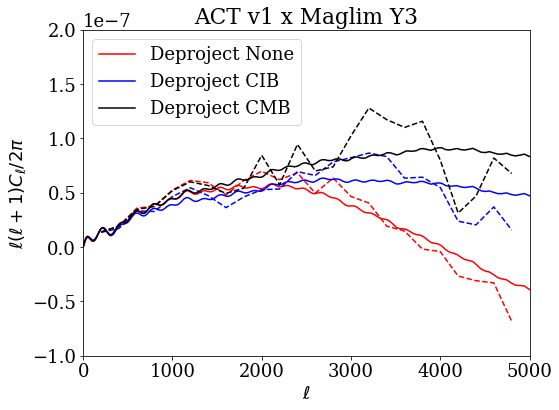

In [104]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))    
ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_none/(2*np.pi),color='r',ls='-',label='Deproject None')
ax.errorbar(ell,Bl1 *(ell)*(ell+1.) *data_none/(2*np.pi),color='r',ls='--')

ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_cib/(2*np.pi),color='b',ls='-',label='Deproject CIB')
ax.errorbar(ell,Bl1 *(ell)*(ell+1.) *data_cib/(2*np.pi),color='b',ls='--')

ax.errorbar(ell_out,(ell_out)*(ell_out+1.) *Cellyk_cmb/(2*np.pi),color='k',ls='-',label='Deproject CMB')
ax.errorbar(ell,Bl1 *(ell)*(ell+1.) *data_cmb/(2*np.pi),color='k',ls='--')

# ax.errorbar(theta_array, xi_w1,  label = labels[j], linestyle=linestyles[j])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(0,5000)
ax.set_ylim(-1e-7,2e-7)
ax.set_ylabel(r'$\ell (\ell + 1) C_{\ell} / 2\pi$')
ax.set_xlabel(r'$\ell$')
ax.legend()
# ax.set_title('ACT v1 x Redmagic Y3')
ax.set_title('ACT v1 x Maglim Y3')








In [107]:
(1.)/(0.1*(1./60.)*(np.pi/180.))


34377.46770784939

In [3]:
filenames = [
'/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_None_v1.0.0_fwhm_2arcmin_nside4096__cat_maglim_z_0.2_1.05_dojk_True_njk_60_desy3_w1.pk',
'/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/dy/dy_act_deprojects_None_v1.0.0_fwhm_2arcmin_nside4096__cat_redmagic_z_0.15_0.9_dojk_True_njk_60_desy3_w1.pk',
]

labels = ['Magnitude limited', 'Redmagic']


linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.









In [ ]:
import pdb
import scipy.interpolate as interpolate
# plot the galaxy-y correaltion
fig, ax = pl.subplots(2,1, sharex = True)
fig.set_size_inches((8,12))
fig.subplots_adjust(hspace = 0.)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

xmin = 0.1
xmax = 200.   


for j in range(len(filenames)):
    filename = filenames[j]    
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']



    randytruth = haloydata['randytruth']

    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']


        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

    
#     ax[0].errorbar(factor*np.exp(dyrecon.logr)*1.02**(j), xi_dy,  yerr=xi_dy_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color = Color[j+1])
    
#     ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2, color =nice_colors(j))
    if labels[j] == 'All bins':
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='-', capsize=3, lw = 2, color ='k',marker='.')
    else:
        ax[0].errorbar(factor*np.exp(dytruth.logr)*1.05**(j), xi_dytruth, yerr=xi_dytruth_sigma, label = labels[j], linestyle='None', capsize=3, lw = 2,marker='.', color =nice_colors(j))

    
    if j == 0:
        xi_interp_none = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')
    if j == 1:
        xi_interp_cib = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')
    if j==2:
        xi_interp_cmb = interpolate.interp1d((dytruth.logr), np.log(xi_dytruth),fill_value='extrapolate')


        
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[0].set_ylabel(r'$\xi_{yg}(\theta)$', size = 20)

ax[0].set_xlim((xmin, xmax))
ax[0].set_ylim((5.0e-10,3.0e-7))
# ax.set_title('unitynullcmb nside bands methods')
ax[0].legend(fontsize = 20, frameon = False, loc = 'lower left')
#fig.tight_layout()

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)



# ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = 'Planck y', lw = 3, color = Color[0])
for j in range(len(filenames)):
    filename = filenames[j]
    try:
        haloydata = pk.load(open(filename, "rb"))
    except:
        haloydata = pk.load(open(filename, "rb"),encoding='latin1')

    dytruth = haloydata['dytruth']

    randytruth = haloydata['randytruth']
    xi_dytruth = dytruth.xi - randytruth.xi

    if haloydata['do_jk']:
        njk = haloydata['njk']

        xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
        xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
        xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
        xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
        xi_dytruth_sigma = np.sqrt((1.0*(njk-1)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))
        xi_cov = (1.0*(njk-1)/njk)* np.dot((xi_dytruth_all - xi_dytruth_mean).T , (xi_dytruth_all - xi_dytruth_mean))
        xi_corr = corr_mat(xi_cov)
        
        xi_invcov = np.linalg.inv(xi_cov)
#         pdb.set_trace()
        xi_snr = np.sqrt(np.dot(  np.array([dytruth.xi]), np.dot(xi_invcov, np.array([dytruth.xi]).T)  ))
        
        fig2, ax2 = pl.subplots(1,1)
        fig2.set_size_inches((8,6))
        ax2.imshow(xi_corr)
        ax2.tick_params(axis='both', which = 'minor', labelsize=15)
        ax2.tick_params(axis='both', which = 'major', labelsize=15)
        ax2.set_title('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma', size=18)
        fig2.savefig('corr_mat_' + str(labels[j]) + '.pdf')
        

        print('SNR ' + str(labels[j]) + ':' + str(np.round( xi_snr[0][0], 1)) + r' sigma')

    if labels[j] == 'All bins':
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = 'k')
    else:
        ax[1].plot(np.exp(dytruth.logr), 1.0e9*(xi_dytruth_sigma), label = labels[j], lw= 3, color = nice_colors(j))

 

ax[0].set_yscale('log')
ax[0].set_xlim((xmin, xmax))
# ax[0].set_ylim((2.0e-9,6.0e-8))
ax[0].legend(fontsize = 16, frameon = False, loc = 'lower left',ncol=1)    
    
ax[1].set_ylim((1.0, 40.0))
ax[1].set_xlabel(r'$\theta$ (arcmin)', size = 20)
ax[1].set_ylabel(r'Noise in $\xi_{yg}(\theta) \times 10^9$', size = 20)


yticks = ax[1].yaxis.get_major_ticks()
yticks[-1].set_visible(False)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', which = 'minor', labelsize=15)

#pl.setp(ax[0].get_xticklabels(), visible=False)
#ax[0].tick_params(labelbottom=False)    
# print "ax[0].get_x = ", ax[0].get_xticklabels()[0].get_text()

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[1].set_yscale('log')
ax[0].set_title(r'ACT v1 x Maglim Y3', size=18 )
# ax[0].set_title(r'ACT v1 x Redmagic Y3', size=18 )
#xticks = ax[0].xaxis.get_minor_ticks()
#xticks[0].set_visible(False)

#xticks = ax[0].xaxis.get_major_ticks()
#xticks[0].set_visible(False)

#ax[0].set_xticklabels(['','','',''])
#ax[0].set_xticklabels(['','','',''], minor = True)



# fig.savefig('actxdesy3_maglim_redmagic_comp_v1.pdf', format = 'pdf')







